In [16]:
import pandas as pd
import numpy as np
from datetime import date
import seaborn as sns
import kagglehub

import matplotlib.pyplot as plt

Reading file for customer churn

In [3]:
df=pd.read_csv('/users/mac/documents/data_set/customer_churn.csv')

Let's do some EDA on custome churn data 

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Replacing the blank space with 0 and changing the datatype of TotalCharges to float

In [5]:
import numpy as np

# Strip any leading/trailing whitespace from the 'TotalCharges' column
df['TotalCharges'] = df['TotalCharges'].str.strip()

# Replace empty strings with NaN
df['TotalCharges'] = df['TotalCharges'].replace('', np.nan)

# Convert the column to float type
df['TotalCharges'] = df['TotalCharges'].astype('float')


In [6]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


In [10]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

Replacing the string values like YES and NO with 0's and 1's 

In [11]:
def conv(value):
    if value == 1:
        return "Yes"
    else :
        return "No"
    
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


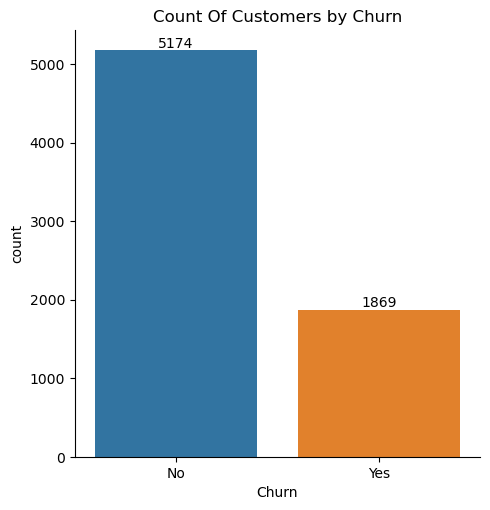

In [17]:
fig = sns.catplot(kind='count',data=df,x='Churn')
ax = fig.ax

for container in ax.containers:
    ax.bar_label(container)
plt.title("Count Of Customers by Churn")

plt.show()

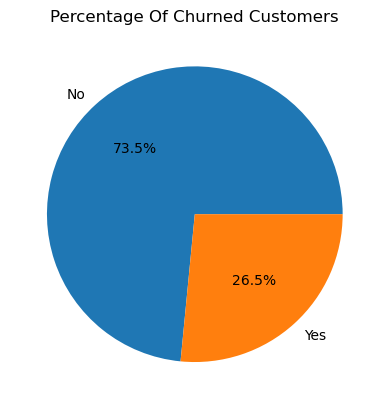

In [19]:
gb = df.groupby(df['Churn']).agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%0.1f%%')
plt.title("Percentage Of Churned Customers")
plt.show()

/Users/mac/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


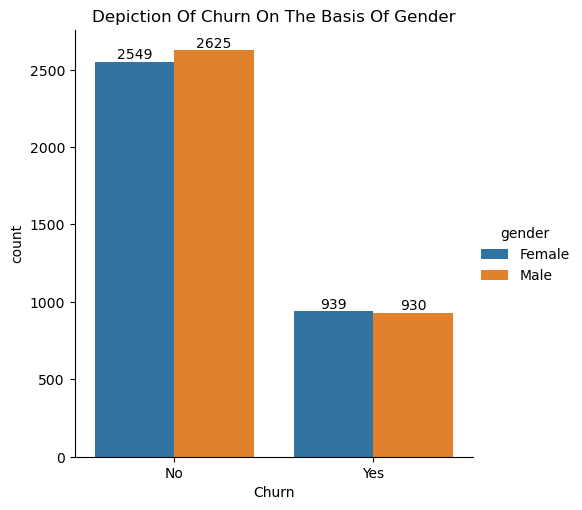

In [20]:
fig = sns.catplot(kind='count',data=df,x='Churn',hue='gender')
ax = fig.ax
plt.title("Depiction Of Churn On The Basis Of Gender")

for container in ax.containers:
    ax.bar_label(container)